In [1]:
import sys,os,shutil
import numpy as np
SimExPath = '/gpfs/exfel/data/user/juncheng/simex-branch/Sources/python/'
SimExExtLib = '/gpfs/exfel/data/user/juncheng/simex-branch/lib/python3.7/site-packages/'
sys.path.insert(0,SimExPath)
sys.path.insert(0,SimExExtLib)

In [2]:
from SimEx.Analysis.XFELPhotonAnalysis import XFELPhotonAnalysis

In [3]:
def calculate_fwhm(wfr):
    """
    Calculate FWHM of the beam calculating number of point bigger then max/2 throuhgt center of the image

    :param wfr:  wavefront
    :return: {'fwhm_x':fwhm_x, 'fwhm_y': fwhm_y} in [m]
    """
    intens = wfr.get_intensity(polarization='total').sum(axis=-1);


    mesh = wfr.params.Mesh
    dx = (mesh.xMax-mesh.xMin)/mesh.nx
    dy = (mesh.yMax-mesh.yMin)/mesh.ny

    x_center = intens[intens.shape[0]//2,:]
    fwhm_x = len(x_center[x_center>x_center.max()/2])*dx

    y_center = intens[:,intens.shape[1]//2]
    fwhm_y = len(y_center[y_center>y_center.max()/2])*dy
    return {'fwhm_x':fwhm_x, 'fwhm_y': fwhm_y}

In [4]:
beam_analysis = XFELPhotonAnalysis(input_path='./Gaussian_3D.h5')


 Start initialization.

 Loading wavefront from ./Gaussian_3D.h5.
 ... done.

 Getting intensities.
 ... done.
 Data dimensions =  (400, 400, 20)

 Masking NANs.
 ... done.



 Plotting intensity map.
R-space


<Figure size 432x288 with 0 Axes>

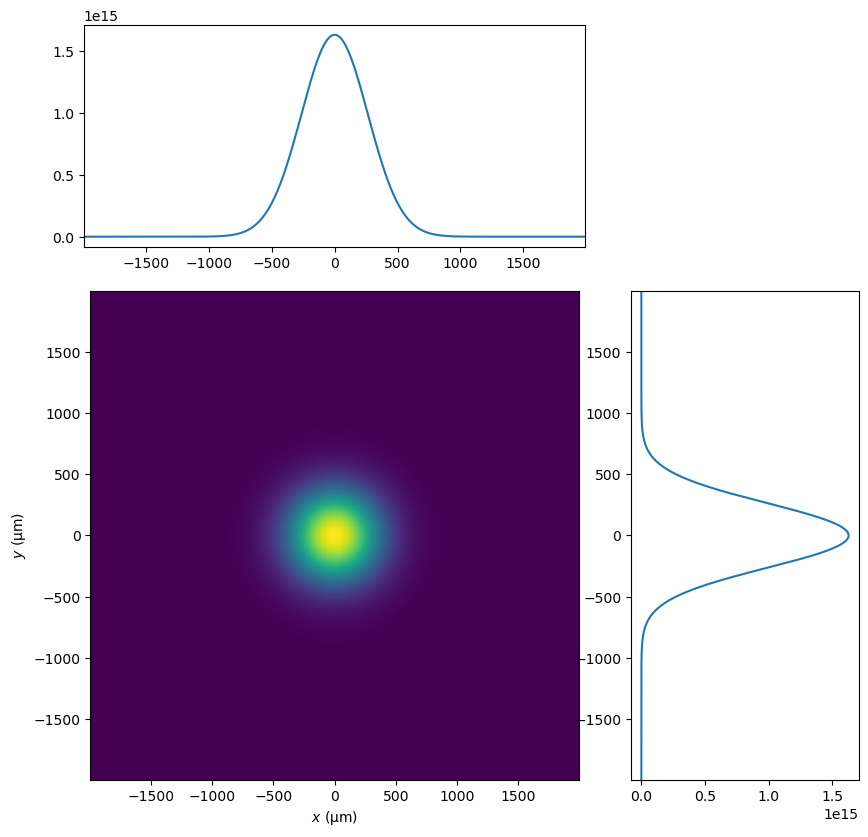

In [5]:
beam_analysis.plotIntensityMap()

In [6]:
# Extract power meaningful points 
time, power = beam_analysis.numpyTotalPower()
# Extract spectrum meaningful points 
photon_energy, spectrum = beam_analysis.numpyTotalPower(spectrum=True)

x: Time (fs)
y: Power (W)
Pulse energy 0.0015 J
Switching to frequency domain.
x: eV
y: J/eV


In [7]:
mean_photon_energy = np.sum(photon_energy*spectrum)/np.sum(spectrum) # unit: eV
print (mean_photon_energy, 'eV')

8499.999535003204 eV


In [8]:
# unit: m
wfr = beam_analysis.wavefront
fwhm = calculate_fwhm(wfr)
fwhm_x = fwhm['fwhm_x']
fwhm_y = fwhm['fwhm_y']

In [9]:
pulse = [[time*1e-15, power],
                 [photon_energy, spectrum],
                 [fwhm_x,fwhm_y],
                 mean_photon_energy]

In [10]:
pulse_list = []
for i in range(500):
    pulse_list.append(pulse)

In [11]:
np.save('pulse.npy',pulse_list)


 Plotting total power.

 Switching to frequency domain.

 Plotting total power.
Pulse energy 0.0015 J


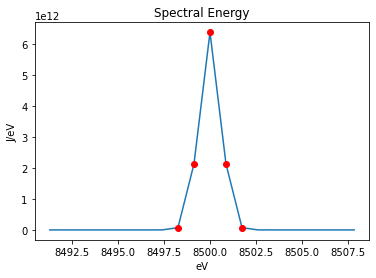

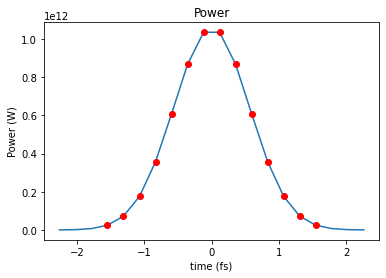

In [12]:
beam_analysis.plotTotalPower(spectrum=True)
beam_analysis.plotTotalPower(spectrum=False)

## Read pulse.npy

In [13]:
import matplotlib.pyplot as plt
test = np.load('pulse.npy',allow_pickle=True)
# Read the first pulses
p0 = test[0]
time, power = p0[0]
photon_energy, spectrum = p0[1]
fwhm_x,fwhm_y = p0[2]
mean_photon_energy = p0[3]

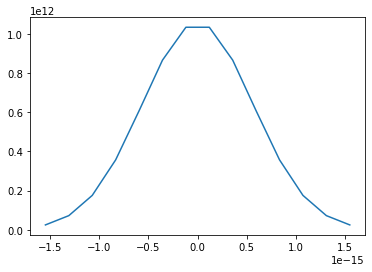

In [14]:
plt.plot(time, power)

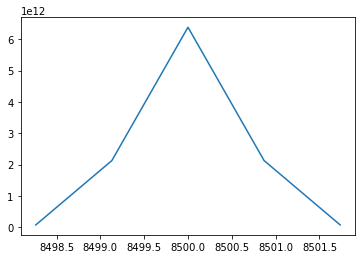

In [15]:
plt.plot(photon_energy, spectrum)